In [167]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [168]:
pd.options.display.max_rows = 10

In [169]:

cars  = pd.read_csv('/home/jovyan/MonDossier/matplolib/files/cars.csv',index_col=0)
cars

,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
Car_id,,,,,,,,,,,,,,,
C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale


# data cleaning

In [170]:
#replace DoubleÂ Overhead Camshaft with Double Overhead Camshaft
cars["Engine"]
cars["Engine"]=cars["Engine"].replace('Â', '', regex=True)

#Setting regex=True 
#allows the replace() method to interpret the first argument ('Â') as a regular expression pattern.

In [172]:
#change date format from 12/31/2023 to 31/12/2023 using datetime
import datetime as dt
cars["Date"]= pd.to_datetime(cars["Date"],format = "%m/%d/%Y" )


In [173]:
#pandas doesn’t allow implicit conversion from one type to another in the same column:
#create new column to have the month/year as a string 
cars['FormattedDate'] = cars['Date'].dt.strftime('%d-%Y')

In [174]:
#null values control
cars.isnull().sum()

Date             0
Customer Name    0
Gender           0
Annual Income    0
Dealer_Name      0
                ..
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
FormattedDate    0
Length: 16, dtype: int64

In [175]:
cars


,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region,FormattedDate
Car_id,,,,,,,,,,,,,,,,
C_CND_000001,2022-01-02,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,Double Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown,02-2022
C_CND_000002,2022-01-02,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,Double Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora,02-2022
C_CND_000003,2022-01-02,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville,02-2022
C_CND_000004,2022-01-02,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco,02-2022
C_CND_000005,2022-01-02,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,Double Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville,02-2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C_CND_023902,2023-12-31,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco,31-2023
C_CND_023903,2023-12-31,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,Double Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown,31-2023
C_CND_023904,2023-12-31,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale,31-2023


In [176]:
cars.columns

Index(['Date', 'Customer Name', 'Gender', 'Annual Income', 'Dealer_Name',
       'Company', 'Model', 'Engine', 'Transmission', 'Color', 'Price ($)',
       'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region', 'FormattedDate'],
      dtype='object')

# Charts

## Bar Chart: Average Price by Model

In [178]:
df2 = cars.groupby('Model')['Price ($)'].aggregate(np.mean).round(2).reset_index()
df2

,Model,Price ($)
0,3-Sep,37986.38
1,3000GT,22282.25
2,300M,21394.89
3,323i,17355.63
4,328i,27821.36
...,...,...
149,Viper,30905.26
150,Voyager,31491.11
151,Windstar,23682.84
152,Wrangler,20134.55


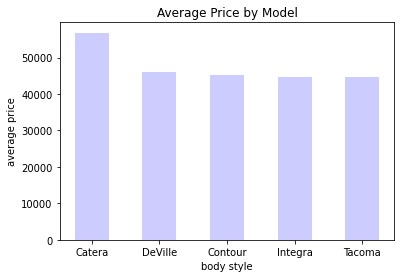

In [230]:
df2_sorted = df2.sort_values(by='Price ($)', ascending=False).head(5)
plt.bar (df2_sorted["Model"],df2_sorted["Price ($)"],color="blue", alpha=0.2,width = 0.5)
plt.title('Average Price by Model')
plt.xlabel('body style')
plt.ylabel('average price')
plt.show()

## Bar Chart: Average Price by Body style

In [180]:
df = cars.groupby('Body Style')['Price ($)'].aggregate(np.mean).round(2).reset_index()
df

,Body Style,Price ($)
0,Hardtop,29151.10
1,Hatchback,27127.04
2,Passenger,28942.03
3,SUV,26767.67
4,Sedan,29832.80


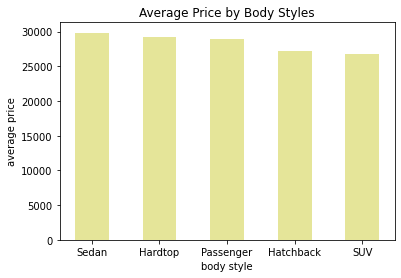

In [223]:
df_sorted = df.sort_values(by='Price ($)', ascending=False)
plt.bar (df_sorted["Body Style"],df_sorted["Price ($)"],color="y", alpha=0.4,width = 0.5)
plt.title('Average Price by Body Styles')
plt.xlabel('body style')
plt.ylabel('average price')
plt.show()


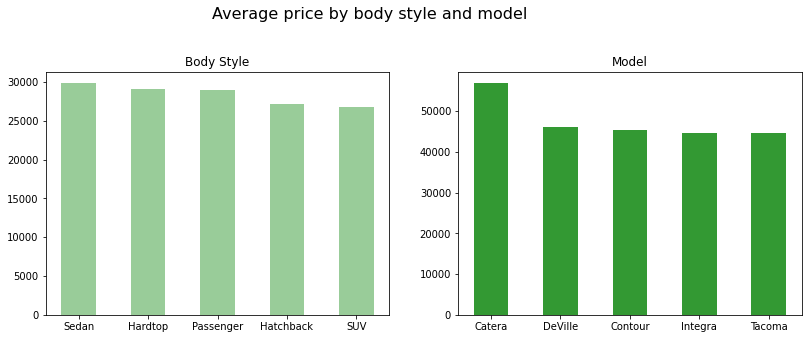

In [228]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(15, 5))


axes[0].bar (df_sorted["Body Style"],df_sorted["Price ($)"],color="green", alpha=0.4,width = 0.5)
axes[0].set_title('Body Style')

axes[1].bar (df2_sorted["Model"],df2_sorted["Price ($)"],color="green",  alpha=0.8,width = 0.5)
axes[1].set_title('Model')

fig.suptitle('Average price by body style and model', fontsize=16)
plt.subplots_adjust(left=0.2, wspace=0.2, top=0.8)
plt.show()

## Pie Chart: Distribution of Cars by Transmission Type

In [13]:
cars["Transmission"].value_counts()

Auto      12571
Manual    11335
Name: Transmission, dtype: int64

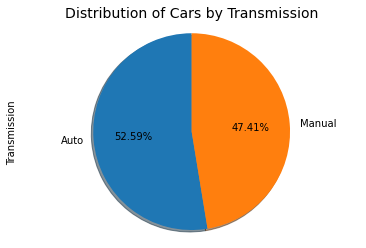

In [229]:

cars["Transmission"].value_counts().plot(kind="pie",  autopct='%.2f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Distribution of Cars by Transmission', fontsize=14)
plt.show()

## area Chart: Trends in Car Prices Over Time

<AxesSubplot:xlabel='Date'>

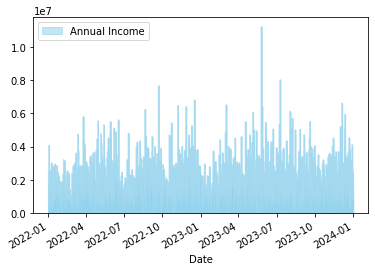

In [151]:
cars.plot(kind="area", x = "Date", y = "Annual Income",color="skyblue", alpha=0.5 )


## Bar Chart: Number of Cars Sold by Dealer Region

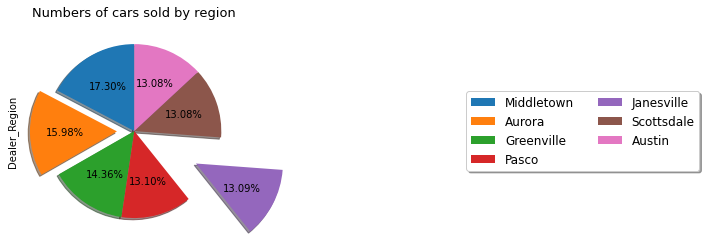

In [221]:
number_by_regions = cars["Dealer_Region"].value_counts()
regions = ['Middletown', 'Aurora', 'Greenville', 'Pasco', 'Janesville',
       'Scottsdale', 'Austin']
explode = (0, 0.2, 0, 0, 0.8, 0,0) 
number_by_regions.plot(kind= "pie", autopct='%.2f%%',labels=None,shadow=True, startangle=90, explode= explode)

plt.legend(regions,title_fontsize=20, fontsize=12, 
           fancybox=True, shadow=True, ncol=2,loc='center left', 
          bbox_to_anchor=(2, 0, 1, 1))
plt.title('Numbers of cars sold by region', fontsize=13)
plt.show()

## BAR chart: Annual Income Distribution

In [236]:
cars["year"]= cars["Date"].dt.year

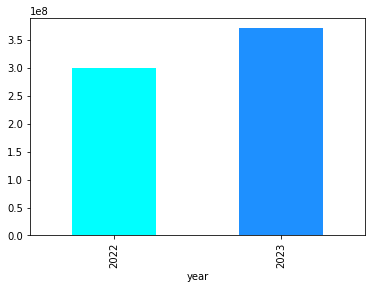

In [240]:
annual_income = cars.groupby([ 'year'])['Price ($)'].sum().plot(
    kind='bar', color = ['cyan', 'dodgerblue'])

## Box Plot:  the distribution of prices by engine type, showing median, quartiles, and outliers.

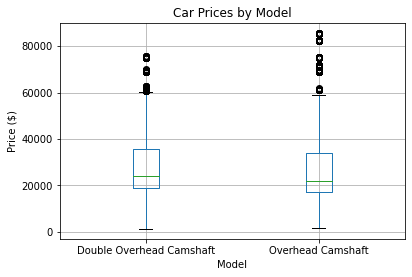

In [28]:
cars.boxplot(column='Price ($)', by='Engine')

# Show the plot
plt.title('Car Prices by Model')
plt.suptitle('')  # This removes the default title to keep it clean
plt.xlabel('Model')
plt.ylabel('Price ($)')
plt.show()

In [41]:
Engine_groups= cars.groupby("Engine")
Engine_groups.get_group("Overhead Camshaft")["Price ($)"].describe()

count    11335.000000
mean     27914.710631
std      15862.871978
min       1700.000000
25%      17000.000000
50%      22001.000000
75%      34000.000000
max      85800.000000
Name: Price ($), dtype: float64

## Scatter : the relationship between annual income and price.


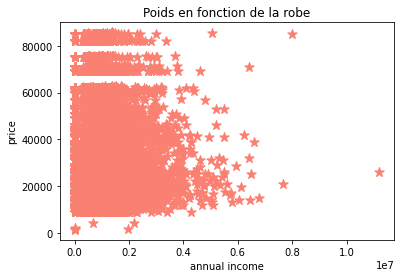

In [133]:
cars.plot(kind = "scatter", x='Annual Income' , y ='Price ($)', color='salmon', s=100, marker='*')
plt.title('Poids en fonction de la robe')
plt.xlabel('annual income')
plt.ylabel('price')
plt.show()

## bar chart :  Gender Distribution of Car Purchases

In [89]:
cars["Gender"].value_counts()

Male      18798
Female     5108
Name: Gender, dtype: int64

<AxesSubplot:>

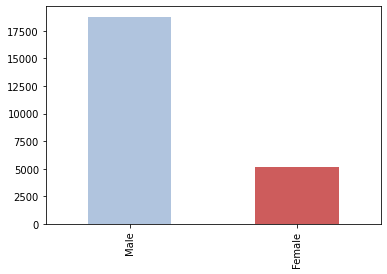

In [234]:
df3= cars["Gender"].value_counts()

df3.plot(kind = "bar" ,color = ['lightsteelblue', 'IndianRed'])